# DE300 Homework 1



# Please run the steps 1,2,3... in order to run the code in the proper order and produce the correct plots

# STEP 1: Importing packages


In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# STEP 2: Loading data file

In [50]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,...,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,target
0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,233.0,...,NaN,NaN,6.0,NaN,NaN,NaN,2.0,16.0,81.0,0.0
1,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,286.0,...,NaN,NaN,3.0,NaN,NaN,NaN,2.0,5.0,81.0,1.0
2,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,229.0,...,NaN,NaN,7.0,NaN,NaN,NaN,2.0,20.0,81.0,1.0
3,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,250.0,...,NaN,NaN,3.0,NaN,NaN,NaN,2.0,4.0,81.0,0.0
4,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,204.0,...,NaN,NaN,3.0,NaN,NaN,NaN,2.0,18.0,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,56.0,1.0,0.0,1.0,1.0,NaN,3.0,125.0,0.0,0.0,...,NaN,NaN,7.0,1.0,0.0,NaN,6.0,25.0,85.0,1.0
897,54.0,1.0,1.0,1.0,1.0,NaN,4.0,130.0,0.0,0.0,...,NaN,NaN,7.0,2.0,0.0,NaN,7.0,4.0,85.0,1.0
898,66.0,0.0,1.0,1.0,1.0,NaN,4.0,155.0,0.0,0.0,...,NaN,NaN,7.0,1.0,0.0,NaN,7.0,4.0,85.0,1.0
899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# STEP 3: Removing columns with minimal data

Dropping columns that contain over 95% empty cells, since imputing data in these columns will result in poor representation


In [51]:
# Step 1: Calculate the number of empty cells per column
empty_counts = df.isna().sum()

# Step 2: Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Step 3: Identify columns with more than 95% empty cells
threshold = 0.95
columns_to_drop = empty_counts[empty_counts / total_rows > threshold].index

#print(columns_to_drop)

# Step 4: Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

print(df)

      age  sex  painloc  painexer  relrest   cp  trestbps  htn   chol  smoke  \
0    63.0  1.0      NaN       NaN      NaN  1.0     145.0  1.0  233.0    NaN   
1    67.0  1.0      NaN       NaN      NaN  4.0     160.0  1.0  286.0    NaN   
2    67.0  1.0      NaN       NaN      NaN  4.0     120.0  1.0  229.0    NaN   
3    37.0  1.0      NaN       NaN      NaN  3.0     130.0  0.0  250.0    NaN   
4    41.0  0.0      NaN       NaN      NaN  2.0     130.0  1.0  204.0    NaN   
..    ...  ...      ...       ...      ...  ...       ...  ...    ...    ...   
896  56.0  1.0      0.0       1.0      1.0  3.0     125.0  0.0    0.0    NaN   
897  54.0  1.0      1.0       1.0      1.0  4.0     130.0  0.0    0.0    NaN   
898  66.0  0.0      1.0       1.0      1.0  4.0     155.0  0.0    0.0    NaN   
899   NaN  NaN      NaN       NaN      NaN  NaN       NaN  NaN    NaN    NaN   
900   NaN  NaN      NaN       NaN      NaN  NaN       NaN  NaN    NaN    NaN   

     ...  slope  rldv5  rldv5e   ca  th

# STEP 4: Dealing with Outliers and Missing data for Binary Attributes

Replacing missing cells and any cell that is not 0 or 1 with the mode of the column.


In [52]:
binary_attributes = [
    'sex',          # Sex of the patient (1 = male, 0 = female)
    'painloc',      # Chest pain location (1 = substernal, 0 = otherwise)
    'painexer',     # Whether pain is provoked by exertion (1 = yes, 0 = no)
    'relrest',      # Whether pain is relieved after rest (1 = yes, 0 = no)
    'smoke',        # Smoking status (1 = yes, 0 = no)
    'fbs',          # Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)
    'dm',           # History of diabetes (1 = yes, 0 = no)
    'famhist',      # Family history of coronary artery disease (1 = yes, 0 = no)
    'dig',          # Digitalis used during exercise ECG (1 = yes, 0 = no)
    'prop',         # Beta blocker used during exercise ECG (1 = yes, 0 = no)
    'nitr',         # Nitrates used during exercise ECG (1 = yes, 0 = no)
    'pro',          # Calcium channel blocker used during exercise ECG (1 = yes, 0 = no)
    'diuretic',     # Diuretic used during exercise ECG (1 = yes, 0 = no)
    'exang',        # Exercise-induced angina (1 = yes, 0 = no)
    'xhypo',        # Hypoxia during exercise (1 = yes, 0 = no)
    'htn',           # Hypertension status (1 = yes, 0 = no)
    'target'
]

for column in binary_attributes:
    # if np.all(np.isin(df[column].dropna().unique(), [0, 1])):  # Check if only contains 0 or 1
    #     # Step 2: Calculate the mode of the binary column
    #     mode_value = df[column].mode()[0]

    #     # Step 3: Replace outliers
    #     # Outliers are values that are not 0 or 1
    #     df[column] = df[column].apply(lambda x: mode_value if x not in [0, 1] else x)

    # NEW
    # Step 1: Calculate the mode of the binary column. Mode returns a Series, so use [0] to get the value.
    mode_value = df[column].mode()[0]

    # Step 2: Replace non-binary and NaN values with the mode
    # Use apply() to replace values
    df[column] = df[column].apply(lambda x: mode_value if x not in [0, 1] or pd.isna(x) else x)




print(df)
print(df['prop'][475])

      age  sex  painloc  painexer  relrest   cp  trestbps  htn   chol  smoke  \
0    63.0  1.0      1.0       1.0      1.0  1.0     145.0  1.0  233.0    1.0   
1    67.0  1.0      1.0       1.0      1.0  4.0     160.0  1.0  286.0    1.0   
2    67.0  1.0      1.0       1.0      1.0  4.0     120.0  1.0  229.0    1.0   
3    37.0  1.0      1.0       1.0      1.0  3.0     130.0  0.0  250.0    1.0   
4    41.0  0.0      1.0       1.0      1.0  2.0     130.0  1.0  204.0    1.0   
..    ...  ...      ...       ...      ...  ...       ...  ...    ...    ...   
896  56.0  1.0      0.0       1.0      1.0  3.0     125.0  0.0    0.0    1.0   
897  54.0  1.0      1.0       1.0      1.0  4.0     130.0  0.0    0.0    1.0   
898  66.0  0.0      1.0       1.0      1.0  4.0     155.0  0.0    0.0    1.0   
899   NaN  1.0      1.0       1.0      1.0  NaN       NaN  0.0    NaN    1.0   
900   NaN  1.0      1.0       1.0      1.0  NaN       NaN  0.0    NaN    1.0   

     ...  slope  rldv5  rldv5e   ca  th

# STEP 5: Dealing with Outliers and Missing data for Categorical Attributes

Replacing missing cells and any cell that is not in the valid value set with the mode of the column


In [53]:
valid_categories = {
    'cp': {1, 2, 3, 4},
    'restecg': {0, 1, 2},
    'proto': {1,2,3,4,5,6,7,8,9,10,11,12},
    'slope': {1,2,3},
    'ca': {0,1,2,3},
    'thal': {3, 6, 7},
    'thalsev': {0,1,2,3}
    #'exerwm': {0,1,2,3},
    #'restwm': {0,1,2,3}
}

for column, valid_set in valid_categories.items():
    mode_value = df[column].mode()[0]
    df[column] = df[column].apply(lambda x: mode_value if x not in valid_set else x)

print(df)
print(df['thalsev'])

      age  sex  painloc  painexer  relrest   cp  trestbps  htn   chol  smoke  \
0    63.0  1.0      1.0       1.0      1.0  1.0     145.0  1.0  233.0    1.0   
1    67.0  1.0      1.0       1.0      1.0  4.0     160.0  1.0  286.0    1.0   
2    67.0  1.0      1.0       1.0      1.0  4.0     120.0  1.0  229.0    1.0   
3    37.0  1.0      1.0       1.0      1.0  3.0     130.0  0.0  250.0    1.0   
4    41.0  0.0      1.0       1.0      1.0  2.0     130.0  1.0  204.0    1.0   
..    ...  ...      ...       ...      ...  ...       ...  ...    ...    ...   
896  56.0  1.0      0.0       1.0      1.0  3.0     125.0  0.0    0.0    1.0   
897  54.0  1.0      1.0       1.0      1.0  4.0     130.0  0.0    0.0    1.0   
898  66.0  0.0      1.0       1.0      1.0  4.0     155.0  0.0    0.0    1.0   
899   NaN  1.0      1.0       1.0      1.0  4.0       NaN  0.0    NaN    1.0   
900   NaN  1.0      1.0       1.0      1.0  4.0       NaN  0.0    NaN    1.0   

     ...  slope  rldv5  rldv5e   ca  th

# STEP 6: Dealing with Outliers and Missing data for Continuous Attributes

Replacing missing cells and any cell that is 1.5 Interquartile Range(IQR) below Q1 or 1.5 Interquartile Range(IQR) above Q3 with the average of the column



In [54]:
continuous_attributes = [
    'age',          # Age of the patient in years
    'trestbps',     # Resting blood pressure in mm Hg on admission to the hospital
    'chol',         # Serum cholesterol in mg/dl
    'cigs',         # Number of cigarettes smoked per day
    'years',        # Number of years the patient has been smoking
    'ekgmo',        # Month of the exercise ECG reading
    'ekgday(day',       # Day of the exercise ECG reading
    'ekgyr',        # Year of the exercise ECG reading
    'thaldur',      # Duration of the exercise test in minutes
    'thaltime',     # Time when ST measure depression was noted
    'met',          # Metabolic equivalents reached during exercise
    'thalach',      # Maximum heart rate achieved during exercise
    'thalrest',     # Resting heart rate
    'tpeakbps',     # Peak systolic blood pressure during exercise
    'tpeakbpd',     # Peak diastolic blood pressure during exercise
    'trestbpd',     # Resting diastolic blood pressure
    'oldpeak',      # ST depression induced by exercise relative to rest
    'rldv5',        # Height at rest (unclear if it's actually height)
    'rldv5e',       # Height at peak exercise (unclear if it's actually height)
    'cmo',          # Month of cardiac catheterization
    'cday',         # Day of cardiac catheterization
    'cyr'           # Year of cardiac catheterization
]

# Replace outliers with the mean for each continuous column
for column in continuous_attributes:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # OLD
    # Calculate mean excluding outliers
    # mean_value = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)].mean()


    # Replace outliers
    # df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean_value, df[column])



    # NEW
    # Filter out outliers for the mean calculation
    filtered_data = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Step 2: Calculate the mean of the column excluding outliers and NaN values
    mean_value = filtered_data.mean()

    # Step 3: Replace NaN values and outliers with the mean
    df[column] = df[column].apply(lambda x: mean_value if pd.isna(x) or x < lower_bound or x > upper_bound else x)

print(df)
df.to_csv('cleaned_imputed_heart_disease.csv', index=False)  # Write to a CSV file without the index



           age  sex  painloc  painexer  relrest   cp    trestbps  htn  \
0    63.000000  1.0      1.0       1.0      1.0  1.0  145.000000  1.0   
1    67.000000  1.0      1.0       1.0      1.0  4.0  160.000000  1.0   
2    67.000000  1.0      1.0       1.0      1.0  4.0  120.000000  1.0   
3    37.000000  1.0      1.0       1.0      1.0  3.0  130.000000  0.0   
4    41.000000  0.0      1.0       1.0      1.0  2.0  130.000000  1.0   
..         ...  ...      ...       ...      ...  ...         ...  ...   
896  56.000000  1.0      0.0       1.0      1.0  3.0  125.000000  0.0   
897  54.000000  1.0      1.0       1.0      1.0  4.0  130.000000  0.0   
898  66.000000  0.0      1.0       1.0      1.0  4.0  155.000000  0.0   
899  53.480534  1.0      1.0       1.0      1.0  4.0  130.684729  0.0   
900  53.480534  1.0      1.0       1.0      1.0  4.0  130.684729  0.0   

           chol  smoke  ...  slope      rldv5      rldv5e   ca  thal  thalsev  \
0    233.000000    1.0  ...    3.0  14.282

# STEP 7: Computing and analyzing statistical measures

We will use the describe() function to list the basic statistical measures for each feature, namely mean, standard deviation, minimum, maximum, and quartile percentages.

In [55]:
summary = df.describe()
print(summary)

              age         sex     painloc    painexer     relrest          cp  \
count  901.000000  901.000000  901.000000  901.000000  901.000000  901.000000   
mean    53.480534    0.791343    0.945616    0.721421    0.776915    3.255272   
std      9.425404    0.406574    0.226900    0.448549    0.416546    0.928133   
min     28.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%     47.000000    1.000000    1.000000    0.000000    1.000000    3.000000   
50%     54.000000    1.000000    1.000000    1.000000    1.000000    4.000000   
75%     60.000000    1.000000    1.000000    1.000000    1.000000    4.000000   
max     77.000000    1.000000    1.000000    1.000000    1.000000    4.000000   

         trestbps         htn        chol       smoke  ...       slope  \
count  901.000000  901.000000  901.000000  901.000000  ...  901.000000   
mean   130.684729    0.457270  244.244541    0.876804  ...    1.849057   
std     15.477557    0.498447   43.999658    0.3

#STEP 8: Visualizing numerical distribution for each feature

We can observe that binary and categorical features will never follow a normal distribution, while some continuous features do, and some do not.

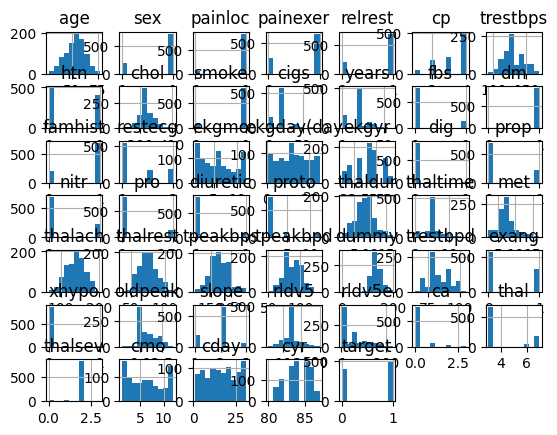

In [56]:
df.hist()
plt.show()

#STEP 9: Transforming continuous features to follow a normal distribution

We can see that after applying log transformation to our continuous features, some columns follow a normal distribution, whiles others still do not. Likely, other transformations should be tested, and possibly also a combination of transformations.

There is no feasible way to transform binary and categorical features to follow a normal distribution, so we will not perform that transformation.

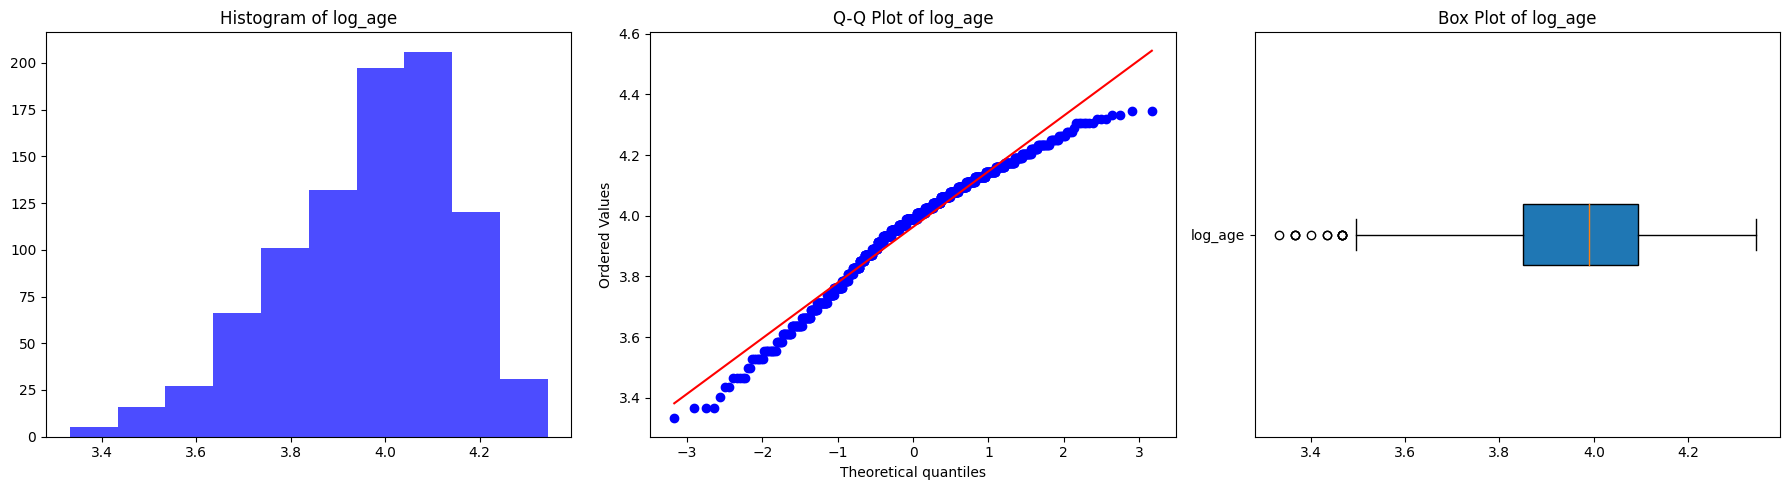

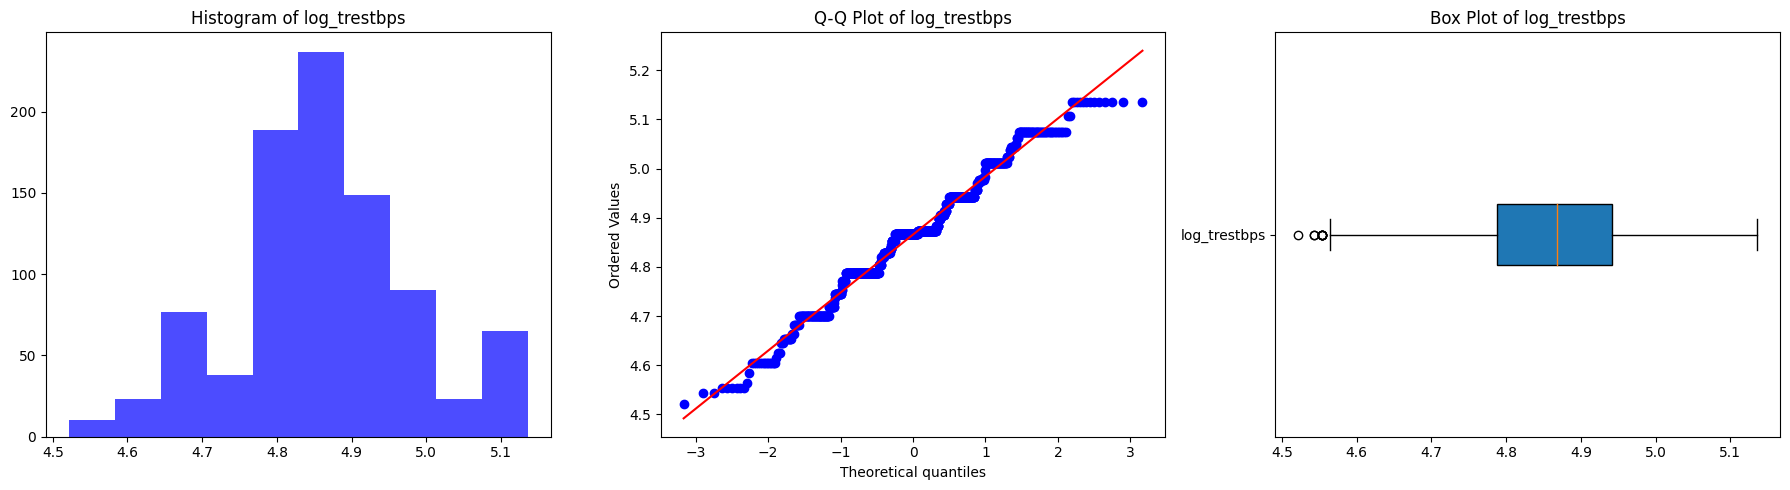

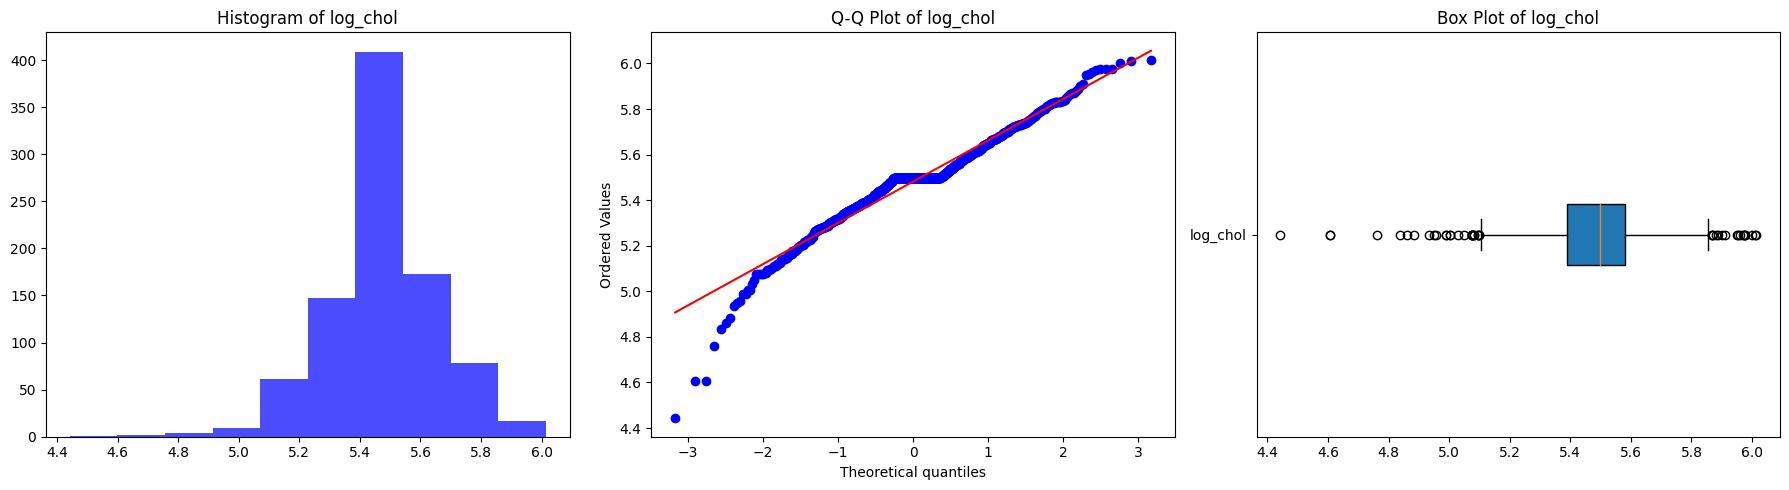

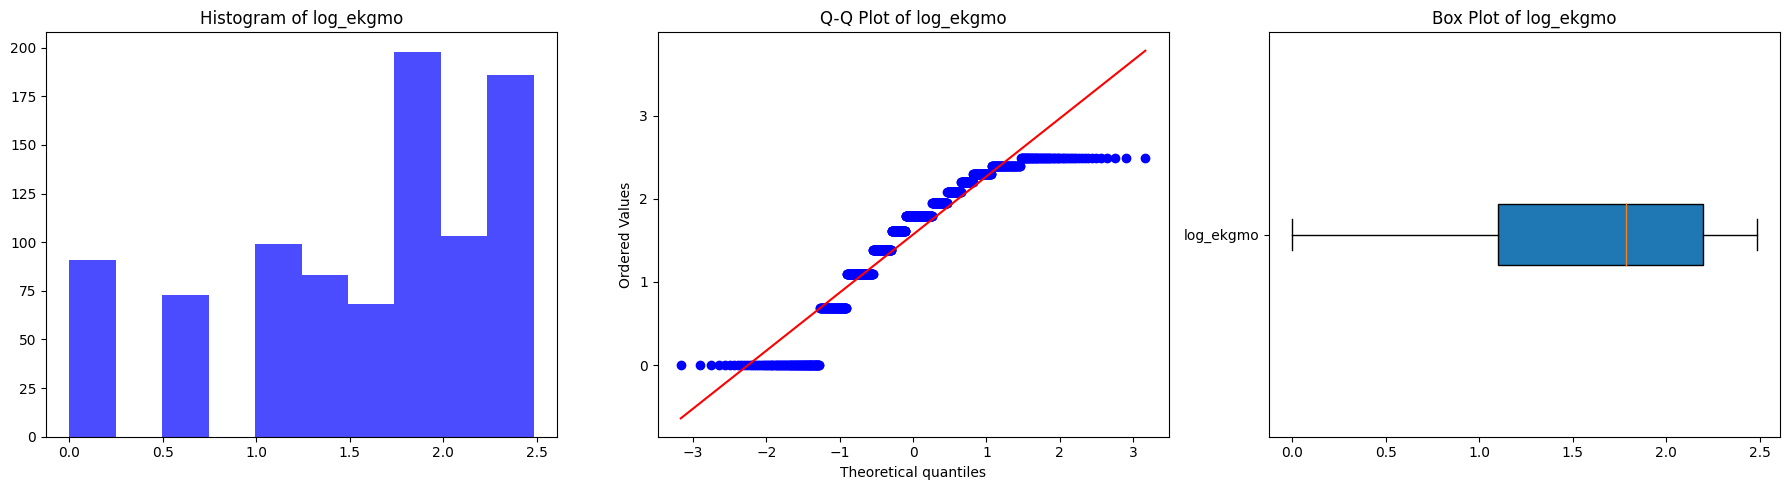

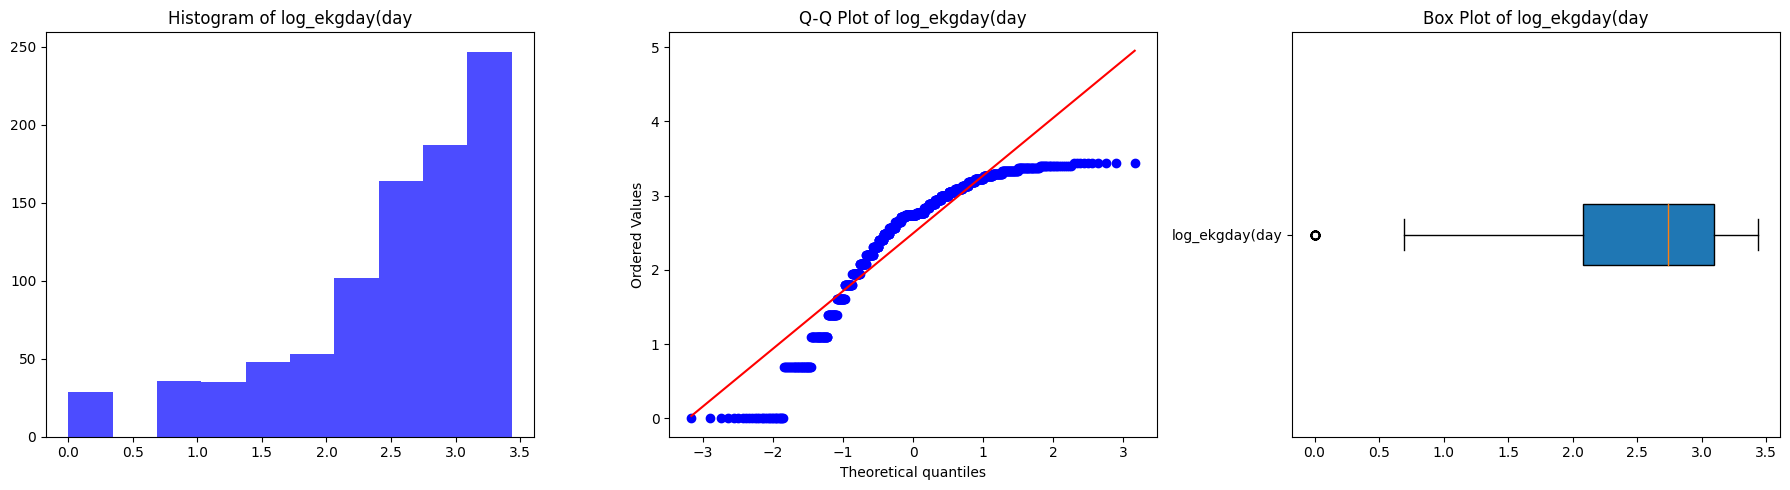

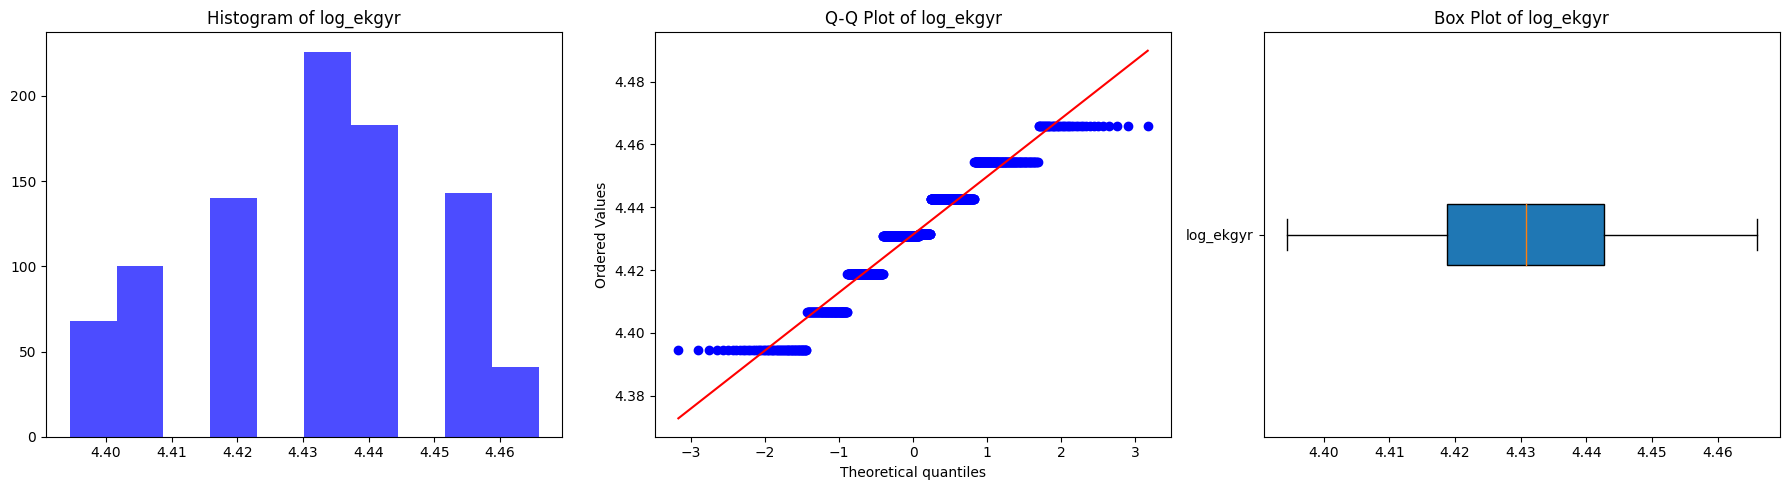

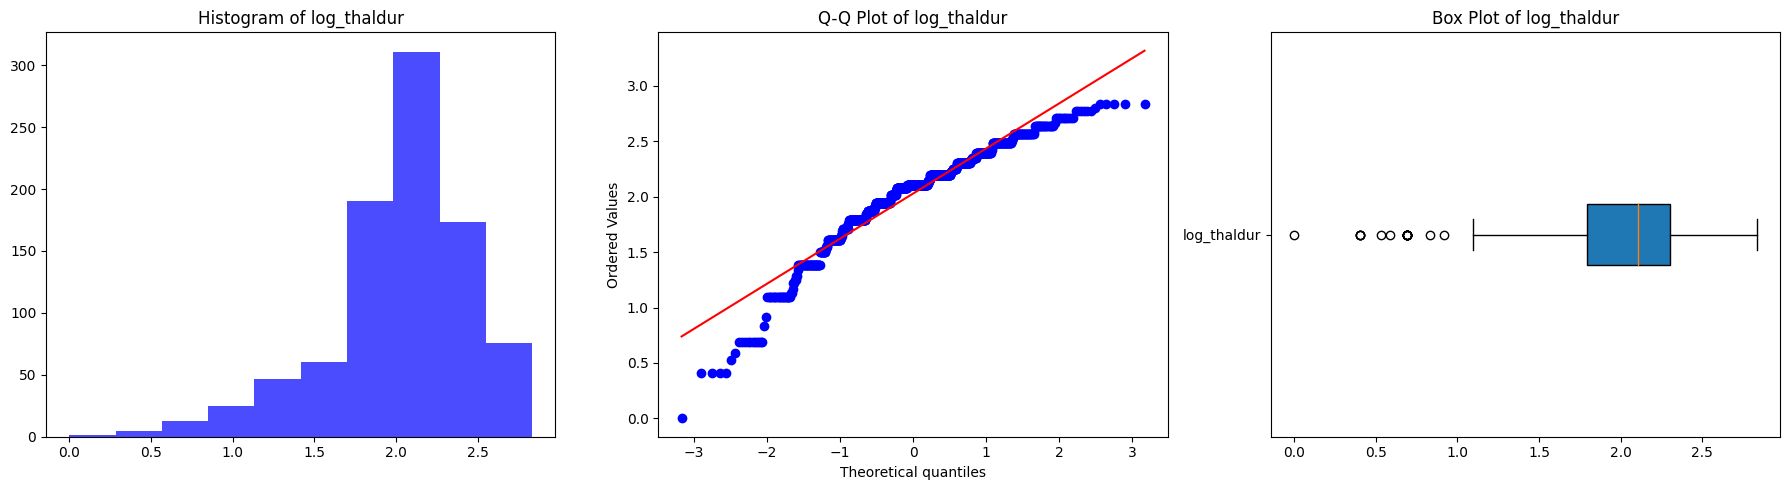

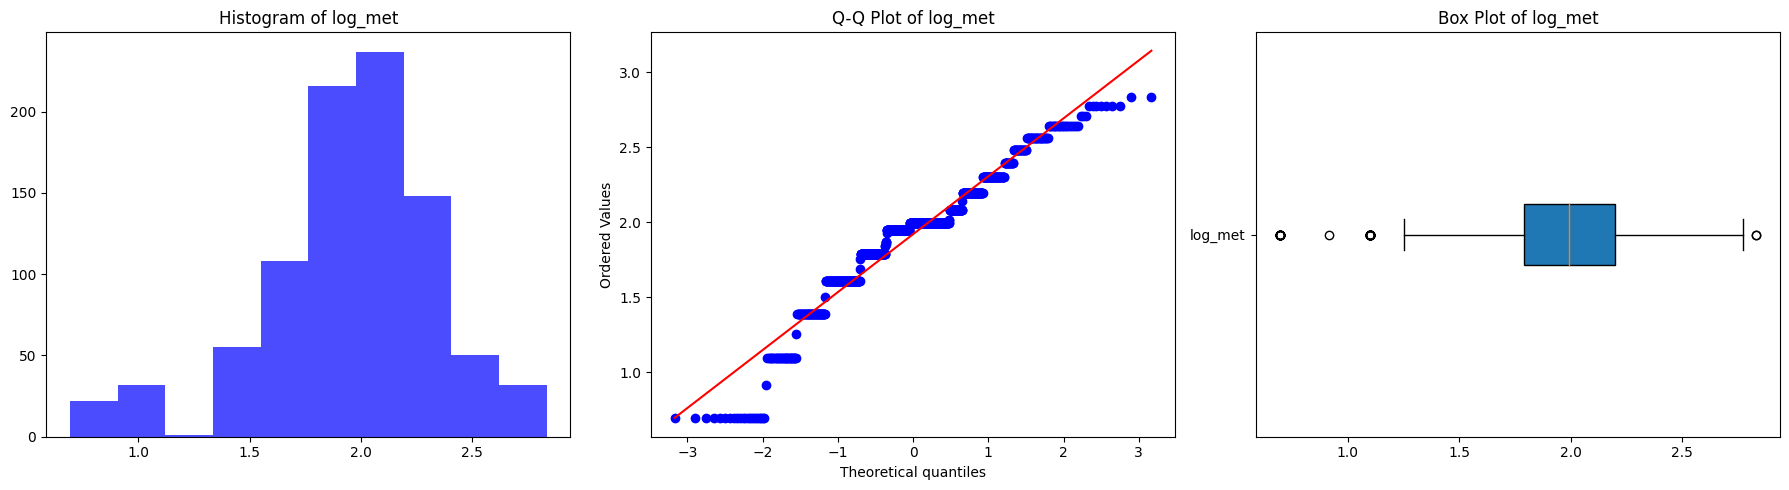

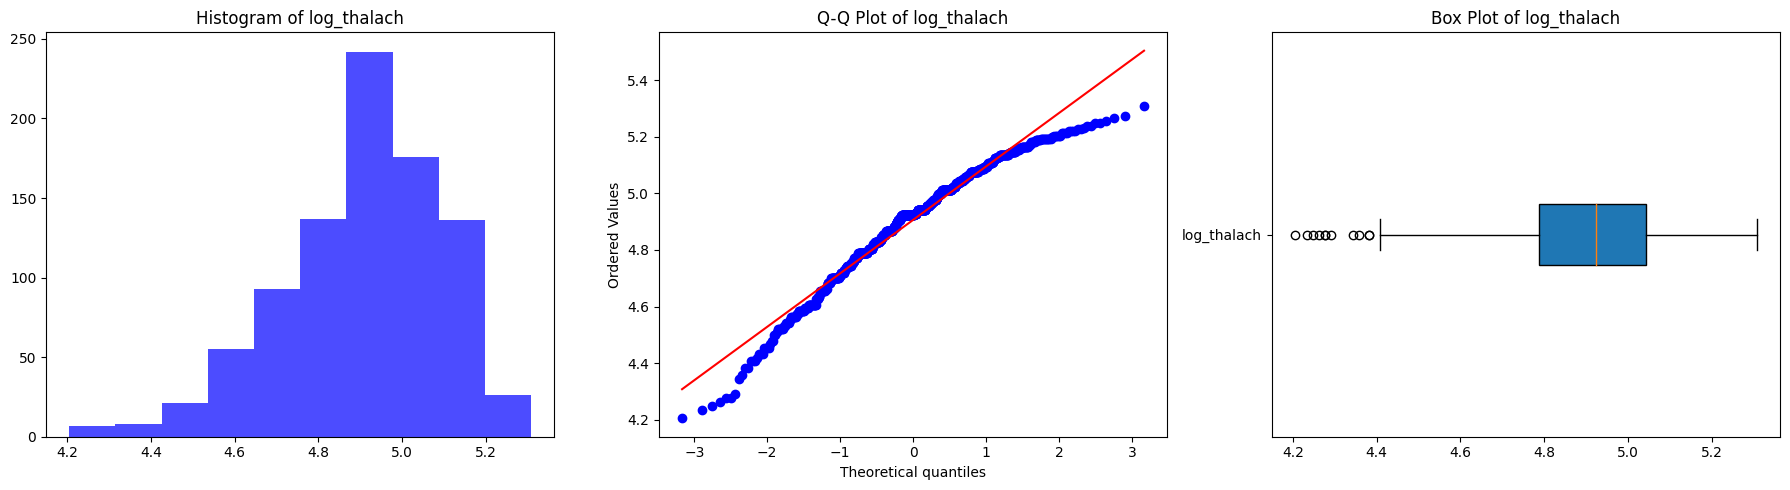

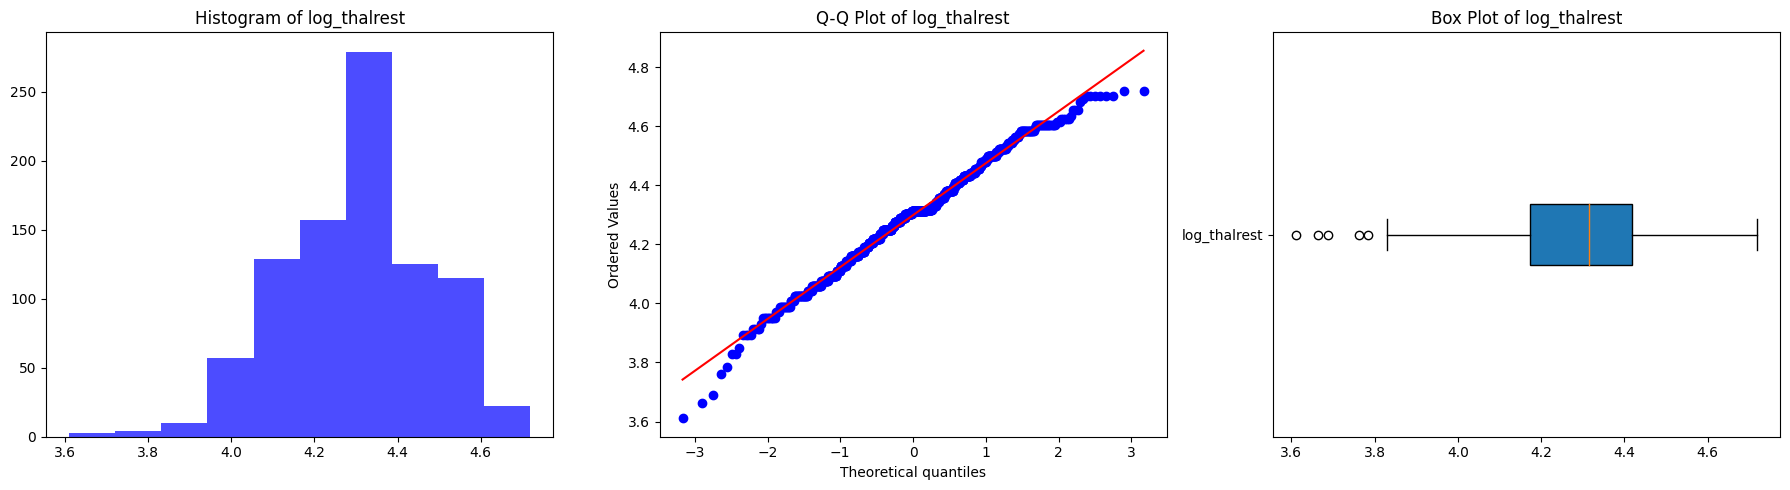

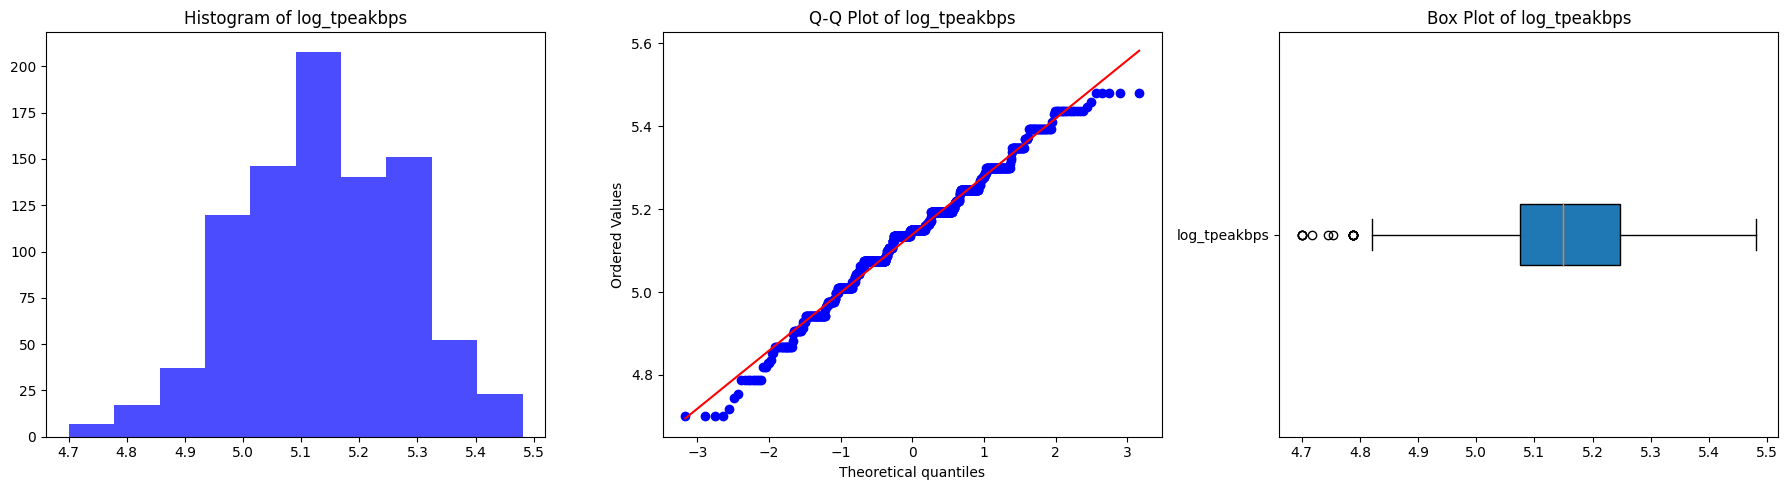

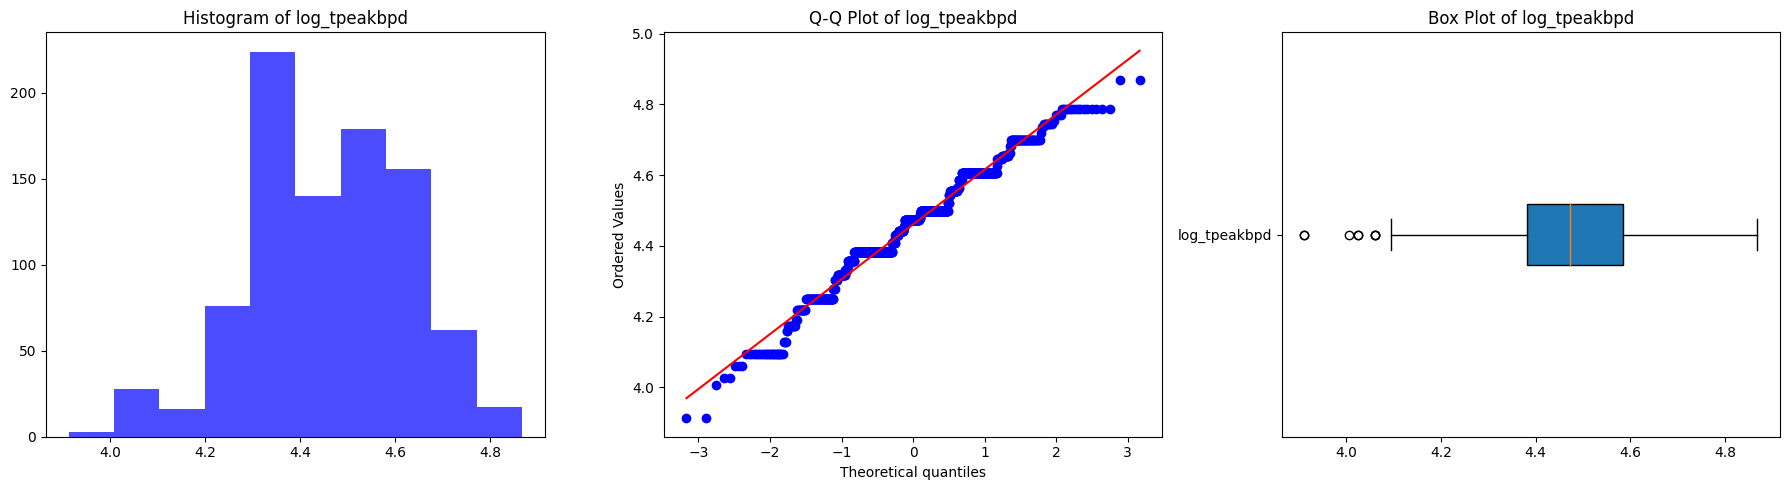

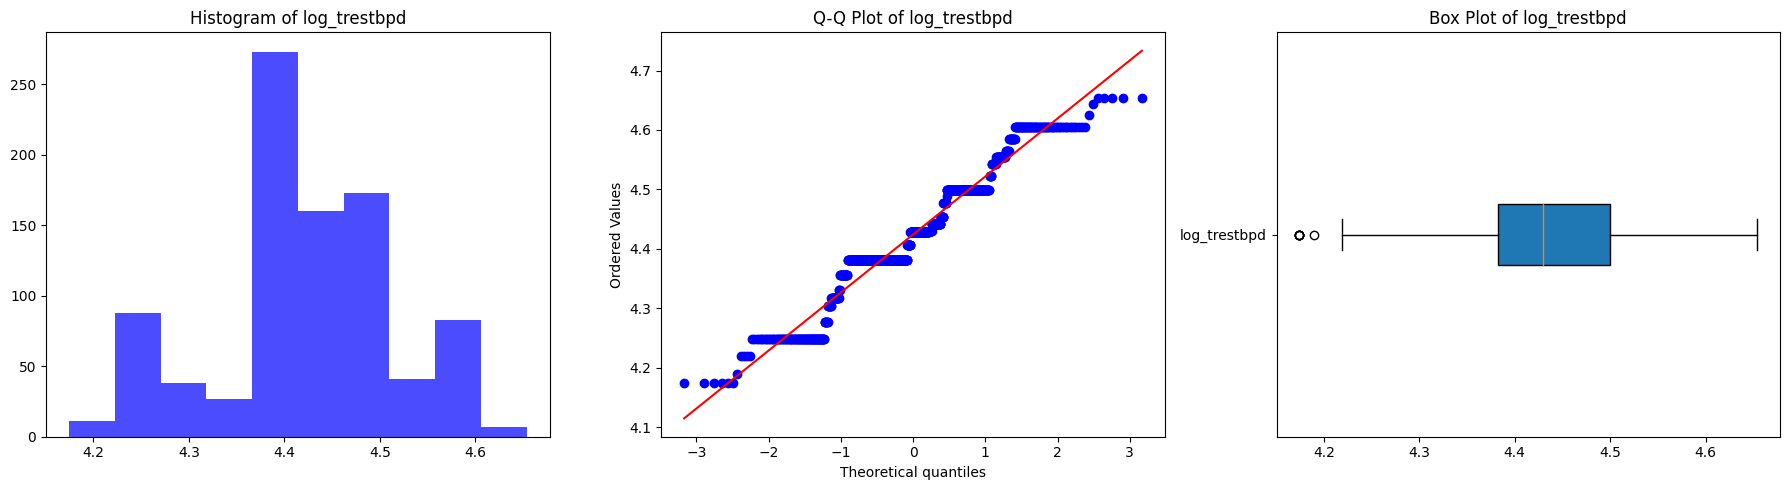

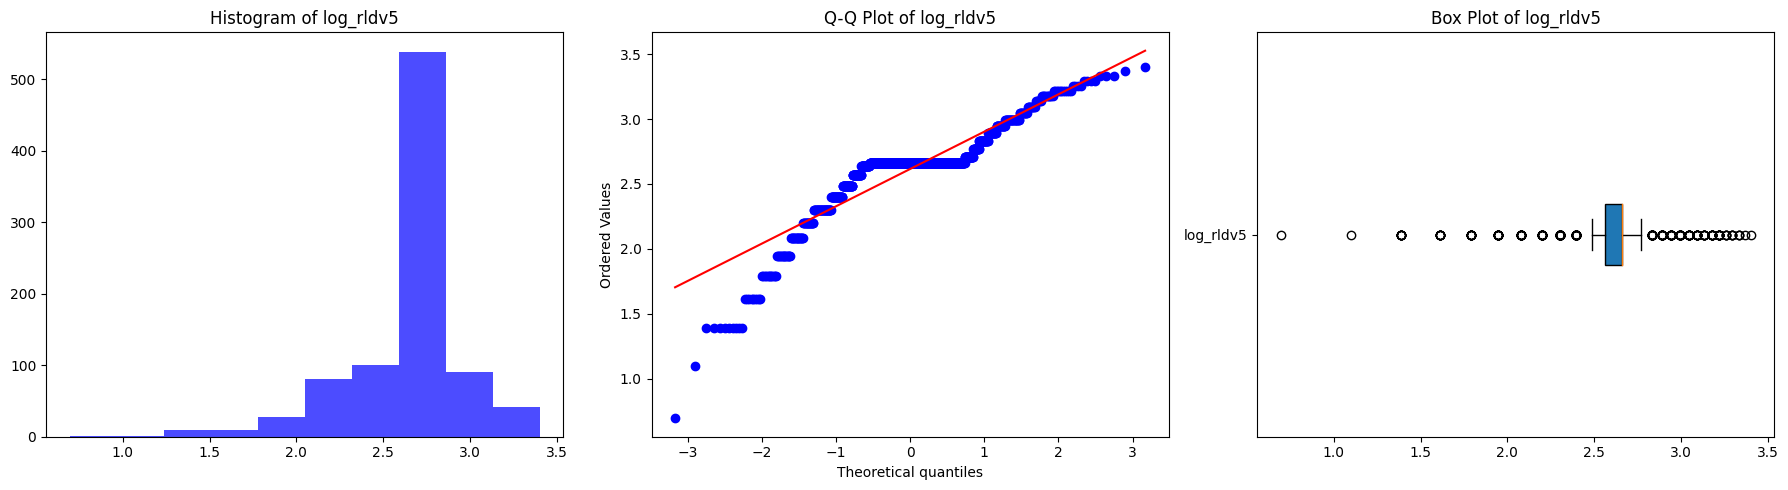

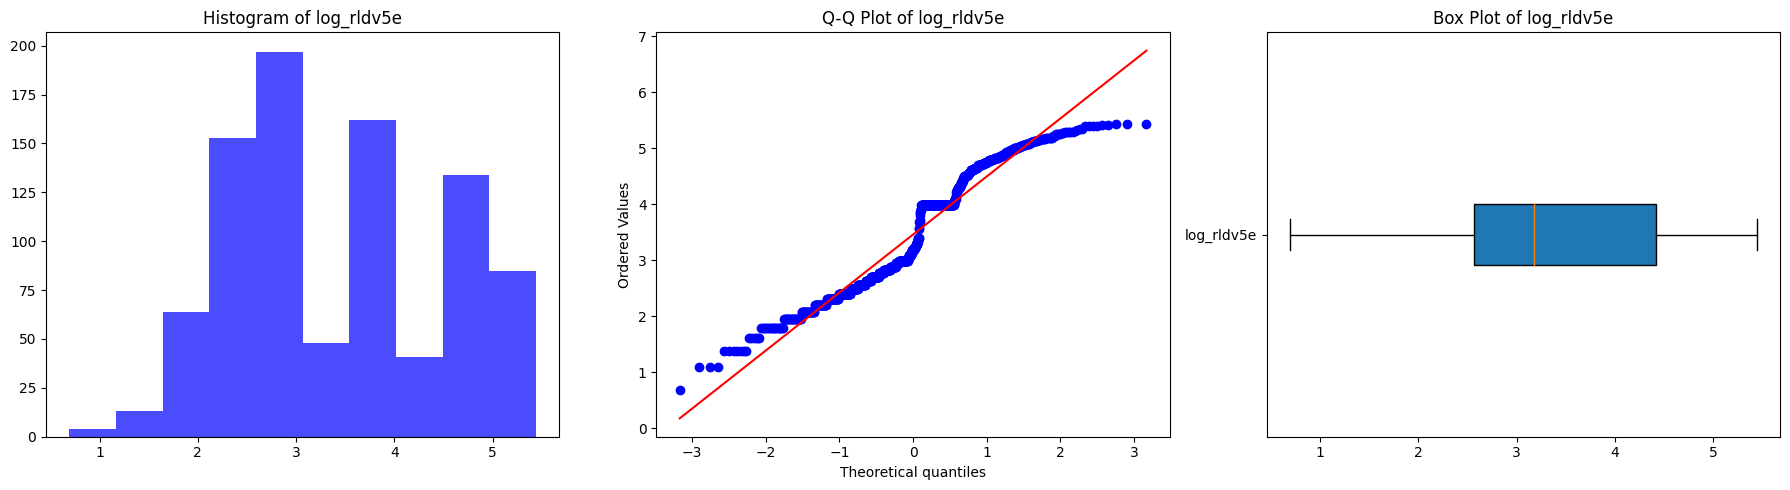

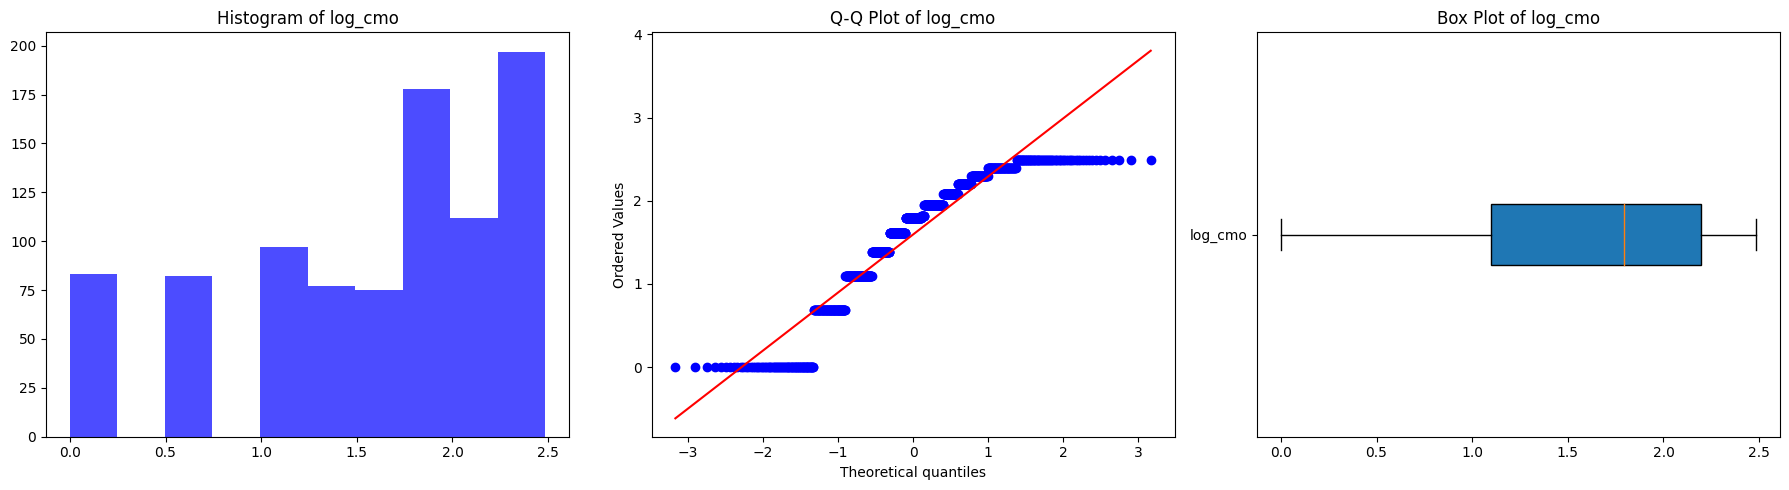

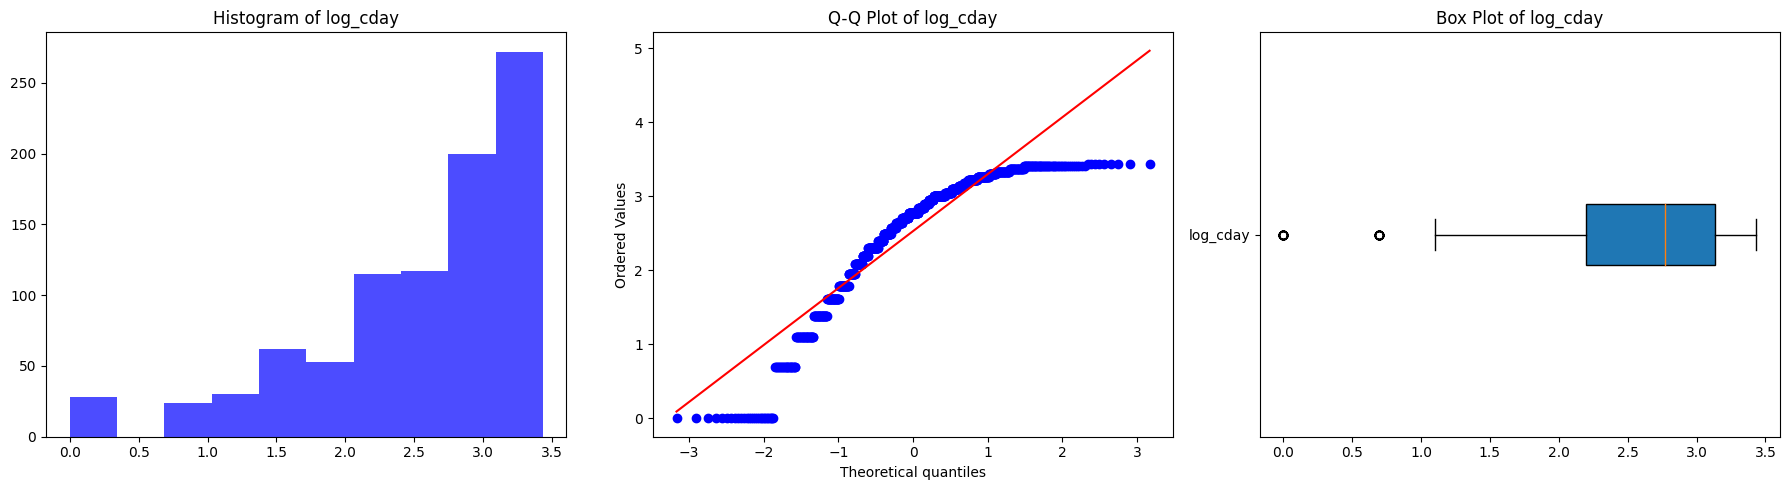

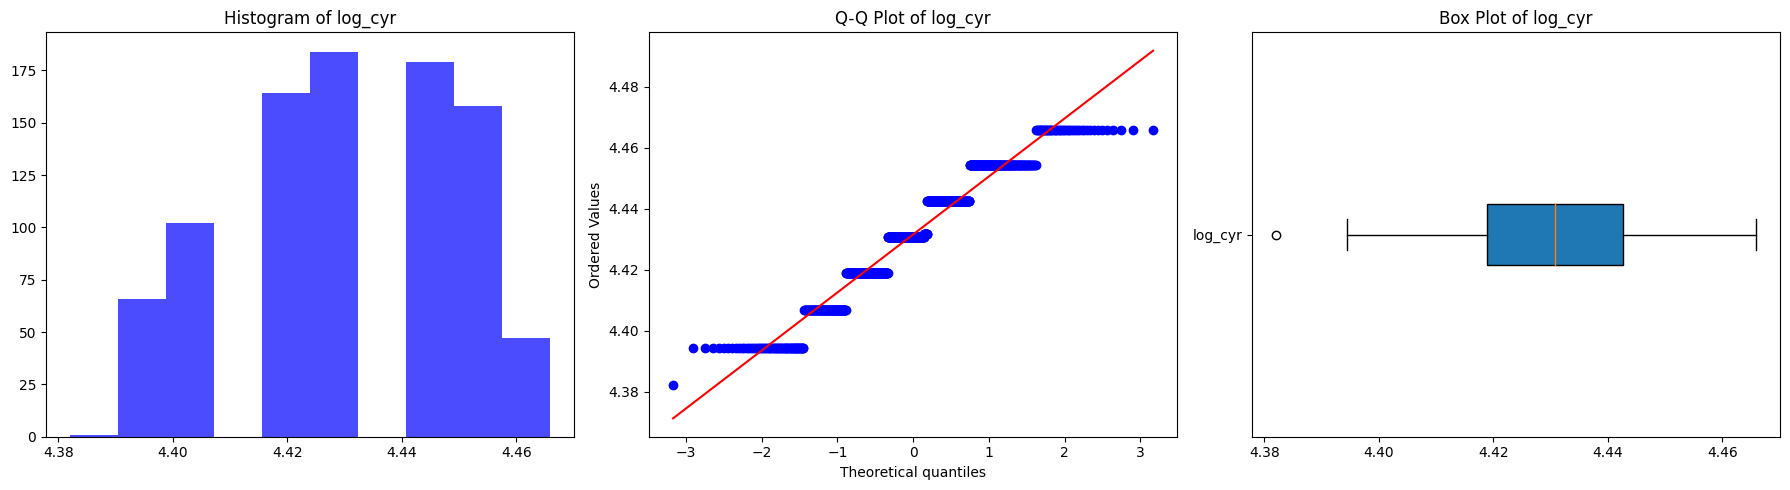

In [57]:
continuous_attributes = [
    'age',          # Age of the patient in years
    'trestbps',     # Resting blood pressure in mm Hg on admission to the hospital
    'chol',         # Serum cholesterol in mg/dl
    'cigs',         # Number of cigarettes smoked per day
    'years',        # Number of years the patient has been smoking
    'ekgmo',        # Month of the exercise ECG reading
    'ekgday(day',       # Day of the exercise ECG reading
    'ekgyr',        # Year of the exercise ECG reading
    'thaldur',      # Duration of the exercise test in minutes
    'thaltime',     # Time when ST measure depression was noted
    'met',          # Metabolic equivalents reached during exercise
    'thalach',      # Maximum heart rate achieved during exercise
    'thalrest',     # Resting heart rate
    'tpeakbps',     # Peak systolic blood pressure during exercise
    'tpeakbpd',     # Peak diastolic blood pressure during exercise
    'trestbpd',     # Resting diastolic blood pressure
    'oldpeak',      # ST depression induced by exercise relative to rest
    'rldv5',        # Height at rest (unclear if it's actually height)
    'rldv5e',       # Height at peak exercise (unclear if it's actually height)
    'cmo',          # Month of cardiac catheterization
    'cday',         # Day of cardiac catheterization
    'cyr'           # Year of cardiac catheterization
]

# Function to plot histogram and Q-Q plot
def plot_data(column, column_name):
    plt.figure(figsize=(18, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    plt.hist(column, bins=10, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column_name}')  # Dynamic title using the column name

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(column, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column_name}')  # Dynamic title using the column name

    # Box plot
    plt.subplot(1, 3, 3)
    plt.boxplot(column, vert=False, patch_artist=True)  # 'vert=False' makes the box plot horizontal
    plt.title(f'Box Plot of {column_name}')
    plt.yticks([1], [column_name])  # Label y-axis with the column name

    plt.tight_layout()
    plt.show()


# Choose a transformation method, e.g., np.log for log transformation
for col in continuous_attributes:
    if (df[col] > 0).all():  # Check if all values are positive for log transformation
        df[f'log_{col}'] = np.log(df[col])
        plot_data(df[f'log_{col}'], f'log_{col}')

